## Business Problem:
- The given datasets are for the data captured by the bank and they are looking for potential/right customer to accept or reject their loan approval request.
- `data 2` dataset is to be used to train model keeping in mind the necessary steps that may include but not limited to: feature identification, exploratory analysis with univariate or bivariate checks, feature engineering, encoding , transformations, MV & Outlier treatment, test-train, performance statistics and prediction variance checks.
- `data 1` is the dataset on which we have to perform prediction.

> Note: We need to apply solo or ensemble from commonly used techniques such as Logit/Trees-/GB/RF and check for different accuracy metrices

### Step-by-Step Procedure

I.	Exploratory data analysis
    
    I.1. General exploration

    I.2. Numerical features
        I.2.1. Explore and clean Numerical features
        I.2.2. Missing data of Numerical features

    I.3. Categorical features
        I.3.1. Explore and clean Categorical features
        I.3.2. Missing data of Categorical features
        I.3.3. Transform Categorical features into Binary features (get_dummies)

    I.4. Merge numerical and binary features into one data set

II.	Feature engineering


III.	Modeling

    III.1. Models and metrics selection

    III.2. Hyperparameters tuning and model optimization
        III.2.1. Logistic regression
        III.2.2. DecisionTree Classifier
        III.2.3. XGBoost Classifier
        III.2.4. RandomForest Classifier

    III.3. Choosing the best model

IV. Prediction

# I. Exploratory Data Analysis

## I.1. General Exploration / Data Inspection

### 1.1. Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import warnings 
warnings.filterwarnings('ignore')

### 1.2. Loading the data sets

In [2]:
data = pd.read_csv("data 2.csv")
print(data.shape)
data.head()

(614, 14)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,DateOfBirth
0,HF001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,04-Jan-1985
1,HF001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,25-Oct-1989
2,HF001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,20-Aug-1986
3,HF001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,18-Aug-1996
4,HF001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,01-Jun-1984


### 1.3. Inspecting the data

In [3]:
# Checking if missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  DateOfBirth        614 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 67.3+ KB


In [4]:
# Checking Data distribution.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [5]:
# Checking number of unique values in each columns
count = 1
for x in data:
    print(f'{count}. {x}: {data[x].nunique()}')
    print(f'{data[x].value_counts()}', end = '\n----------\n\n' )    
    count += 1

1. Loan_ID: 614
HF001002    1
HF002328    1
HF002305    1
HF002308    1
HF002314    1
           ..
HF001692    1
HF001693    1
HF001698    1
HF001699    1
HF002990    1
Name: Loan_ID, Length: 614, dtype: int64
----------

2. Gender: 2
Male      489
Female    112
Name: Gender, dtype: int64
----------

3. Married: 2
Yes    398
No     213
Name: Married, dtype: int64
----------

4. Dependents: 4
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
----------

5. Education: 2
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
----------

6. Self_Employed: 2
No     500
Yes     82
Name: Self_Employed, dtype: int64
----------

7. ApplicantIncome: 505
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
----------

8. CoapplicantIncome: 287
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
16

Things to be noted from above result:
1. There is imbalance in the data. (In Y-variable, one of the class have very high number than the other.)
2. Loan_ID is a unique variable(All the values in the columns are completely different/ Primary key) and needed to be dropped.
3. DateOfBirth is needed to be treated/converted into datetime object.
4. Values of some variables are needed to be treated for building models.

In [6]:
# Dropping unnecessary columns.
data.drop(['Loan_ID'], axis = 1, inplace = True)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


## I.2. Numerical Featues / Continuous variable

### 1.2.1. Exploring and Cleaning the continuous features

#### 1.2.1.1. Extracting Numerical features

In [8]:
cont_data = data[['ApplicantIncome', 'CoapplicantIncome', 'DateOfBirth', 'LoanAmount', 'Loan_Amount_Term']]
cont_data

,ApplicantIncome,CoapplicantIncome,DateOfBirth,LoanAmount,Loan_Amount_Term
0,5849,0.0,04-Jan-1985,NaN,360.0
1,4583,1508.0,25-Oct-1989,128.0,360.0
2,3000,0.0,20-Aug-1986,66.0,360.0
3,2583,2358.0,18-Aug-1996,120.0,360.0
4,6000,0.0,01-Jun-1984,141.0,360.0
...,...,...,...,...,...
609,2900,0.0,09-Sep-1989,71.0,360.0
610,4106,0.0,05-Apr-1996,40.0,180.0
611,8072,240.0,23-Apr-1988,253.0,360.0
612,7583,0.0,24-Jun-1998,187.0,360.0


In [9]:
def converter(date):
    return dt.now().year - dt.strptime(date, "%d-%b-%Y").year

In [10]:
cont_data.DateOfBirth = cont_data.DateOfBirth.apply(converter)

#### 1.2.1.2. Data distribution

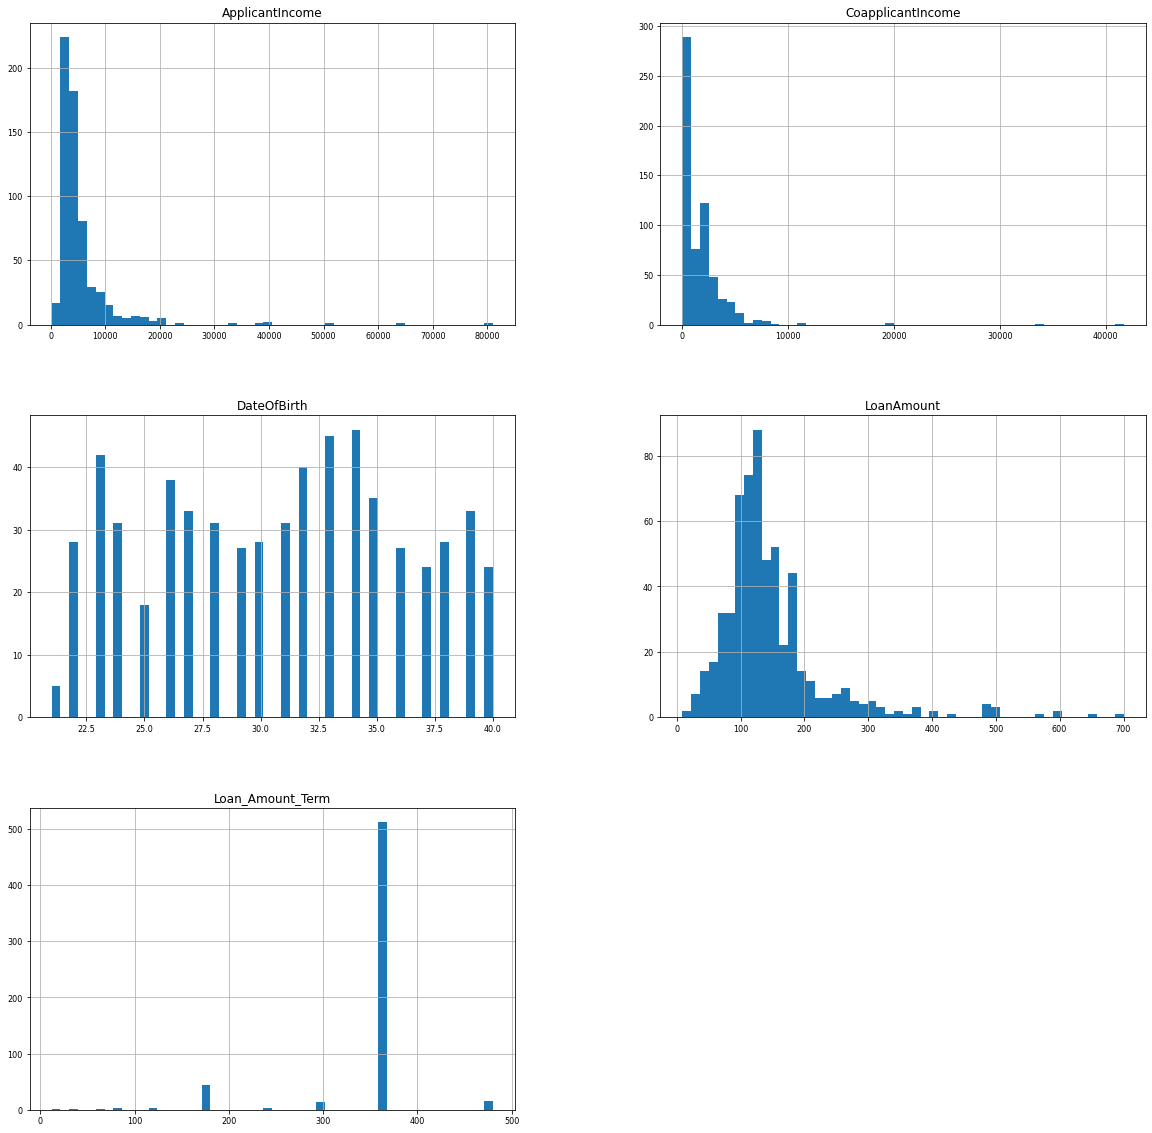

In [11]:
cont_data.hist(figsize = (20, 20), bins = 50, xlabelsize = 8, ylabelsize = 8)
plt.show()

#### 1.2.1.3. BarPlot

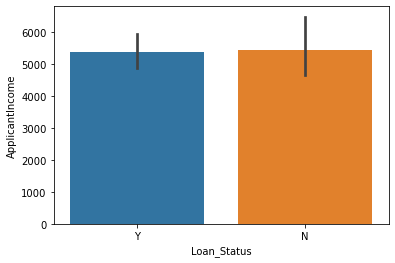

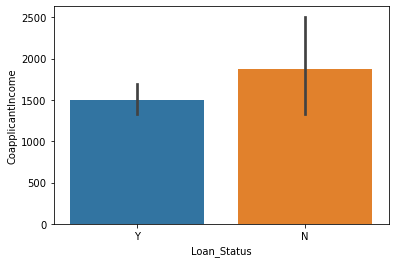

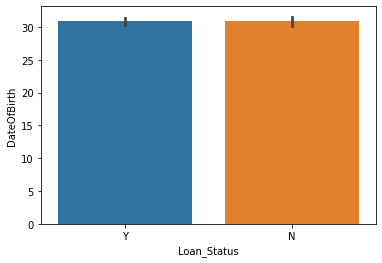

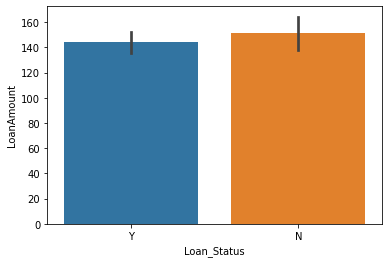

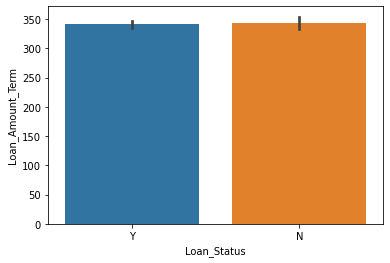

In [12]:
for i in cont_data:
    sns.barplot(y = cont_data[i], x = data['Loan_Status'])
    plt.show()

#### 1.2.1.4. Checking for outliers

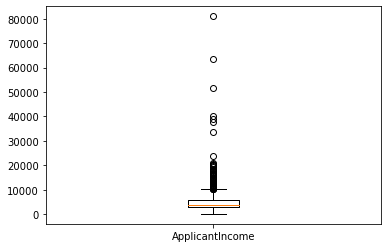

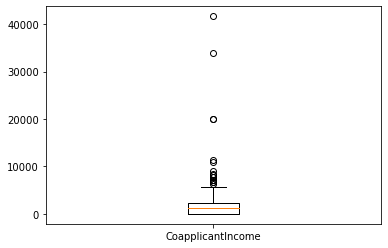

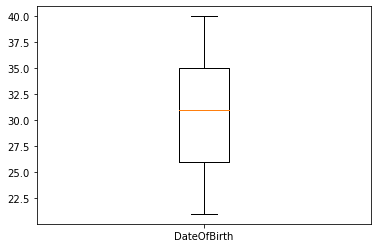

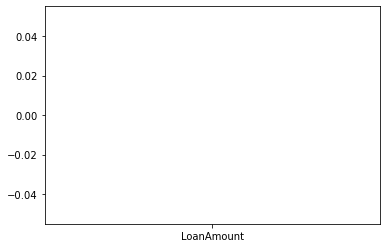

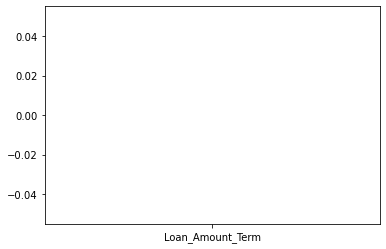

In [13]:
# Using box plot for checking the presence of outliers.
for i in cont_data:
    plt.boxplot(cont_data[i], labels = [i])
    plt.show()

Some variables may show outliers here in the boxplot but actually have a meaningful reason for their presence.
However, we opt for treating them. Outliers should be treated only for necessary variable based on our domain understanding.

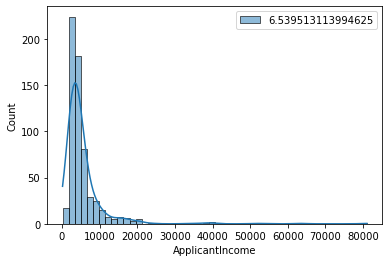

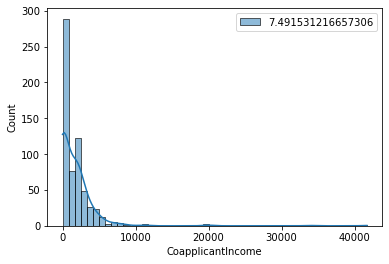

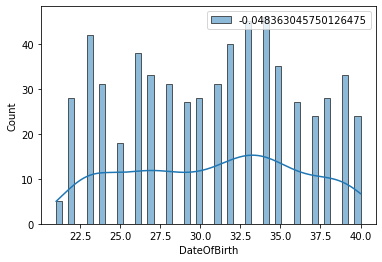

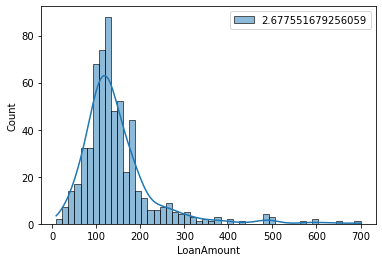

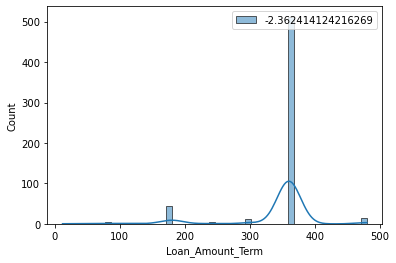

In [14]:
for i in cont_data:
    sns.histplot(cont_data[i], kde = True, bins = 50, label = cont_data[i].skew())
    plt.legend(loc = 'upper right')
    plt.show()

In [15]:
# Using IQR-method for Outliers treatment.
def outlierTreat(x):
    upper = x.quantile(.75) + 1.5 * (x.quantile(.75) - x.quantile(.25)) 
    lower = x.quantile(.25) - 1.5 * (x.quantile(.75) - x.quantile(.25))
    return x.clip(lower, upper)

In [16]:
out_vars = ["ApplicantIncome", "CoapplicantIncome"]

In [17]:
cont_data.loc[:, out_vars] = cont_data.loc[:, out_vars].apply(outlierTreat)
cont_data.loc[:, out_vars]

,ApplicantIncome,CoapplicantIncome
0,5849.0,0.0
1,4583.0,1508.0
2,3000.0,0.0
3,2583.0,2358.0
4,6000.0,0.0
...,...,...
609,2900.0,0.0
610,4106.0,0.0
611,8072.0,240.0
612,7583.0,0.0


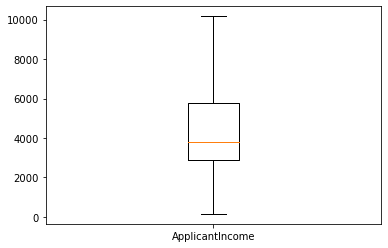

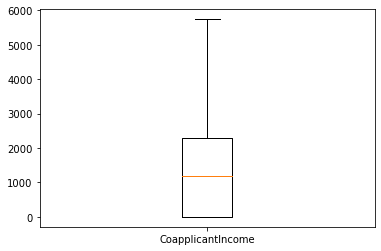

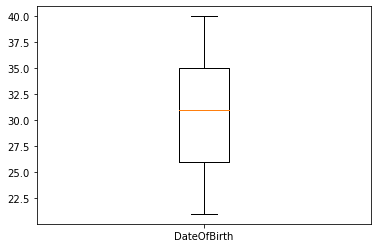

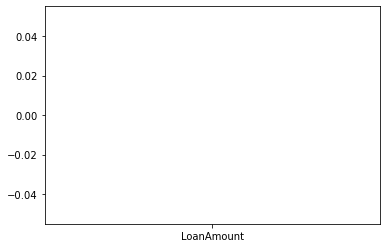

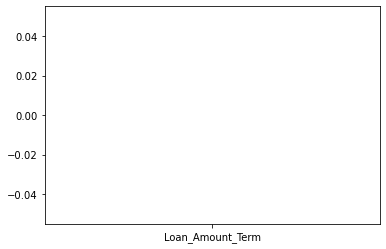

In [18]:
# Using box plot for checking the presence of outliers.
for i in cont_data:
    plt.boxplot(cont_data[i], labels = [i])
    plt.show()

### 1.2.2. Missing value treatment

#### 1.2.2.1. Checking presence of missing values

In [19]:
for i in cont_data:
    print(f'{i}: {cont_data.shape[0] - cont_data[i].count()}')

ApplicantIncome: 0
CoapplicantIncome: 0
DateOfBirth: 0
LoanAmount: 22
Loan_Amount_Term: 14


Hence, there are few missing values for Continuous variables.
Here, we are currently dropping them. It could also have been filled with 0 values assuming that the family have not taken any kind of loan or they have already paid the loan. 

In [20]:
cont_data = cont_data.dropna()

In [21]:
for i in cont_data:
    print(f'{i}: {cont_data.shape[0] - cont_data[i].count()}')

ApplicantIncome: 0
CoapplicantIncome: 0
DateOfBirth: 0
LoanAmount: 0
Loan_Amount_Term: 0


Now, we plot a heatmap to visualize for multi-collinearity. However, we will be using other statistical method to remove multi-collinearity.

<AxesSubplot:>

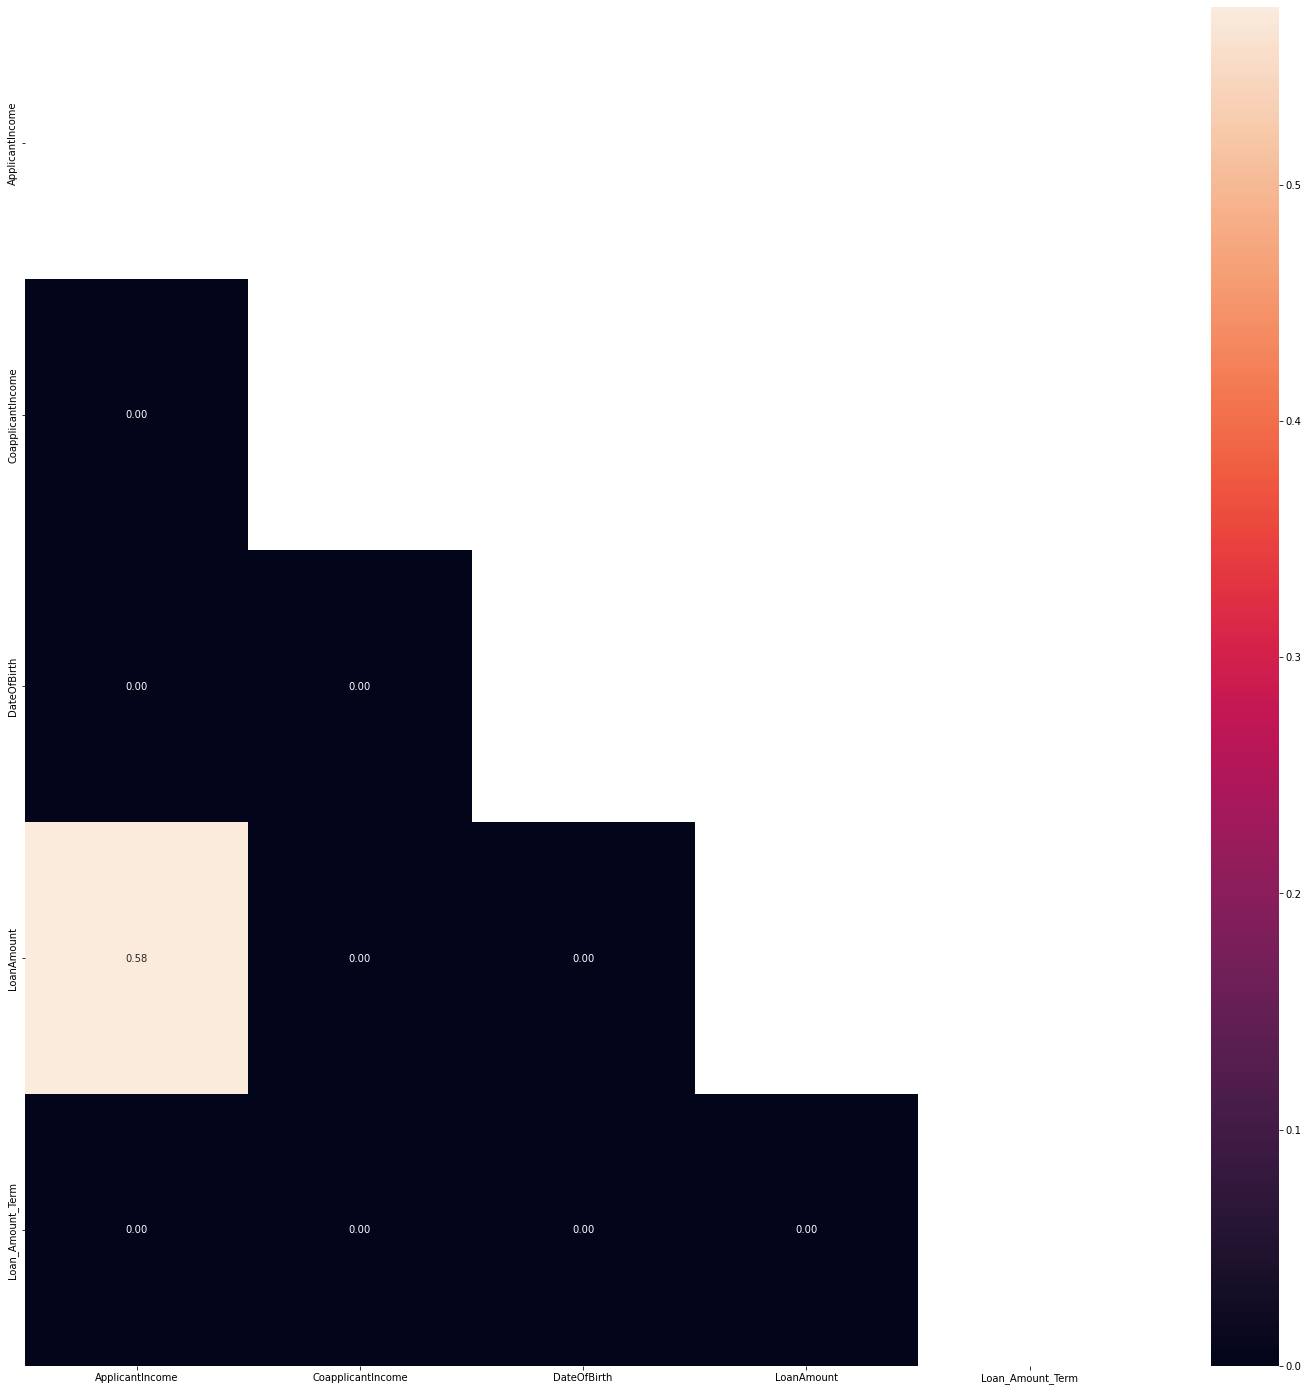

In [22]:
# Finding the correlation.
corr = cont_data.corr()

# Setting the size of figure.
plt.rcParams['figure.figsize'] = (25, 25)

# Argument Trimming out the values above the main diagonal.
mask = np.triu(corr)

# Setting low correlation value to 0.
corr[(corr.values < 0.3) & (corr.values > -0.3)] = 0

# Plotting the heatmap.
sns.heatmap(corr, annot = True, fmt = '.2f', mask = mask)

#### We will be keeping notes of these collinear variables.
#### Later after combining the categorical variables, we'll be dropping out multi-collinearity.

---

## I.3. Categorical Featues

### 1.3.1. Exploring and Cleaning the Categorical features

#### 1.3.1.1. Extracting Categorical features

In [23]:
data.columns.difference(cont_data.columns)

Index(['Credit_History', 'Dependents', 'Education', 'Gender', 'Loan_Status',
       'Married', 'Property_Area', 'Self_Employed'],
      dtype='object')

In [24]:
cat_vars = data[['Credit_History', 'Dependents', 'Education', 'Gender', 'Loan_Status', 'Married', 'Property_Area', 'Self_Employed']]
cat_vars

,Credit_History,Dependents,Education,Gender,Loan_Status,Married,Property_Area,Self_Employed
0,1.0,0,Graduate,Male,Y,No,Urban,No
1,1.0,1,Graduate,Male,N,Yes,Rural,No
2,1.0,0,Graduate,Male,Y,Yes,Urban,Yes
3,1.0,0,Not Graduate,Male,Y,Yes,Urban,No
4,1.0,0,Graduate,Male,Y,No,Urban,No
...,...,...,...,...,...,...,...,...
609,1.0,0,Graduate,Female,Y,No,Rural,No
610,1.0,3+,Graduate,Male,Y,Yes,Rural,No
611,1.0,1,Graduate,Male,Y,Yes,Urban,No
612,1.0,2,Graduate,Male,Y,Yes,Urban,No


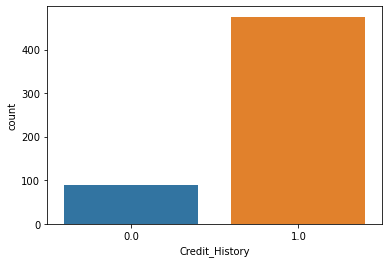

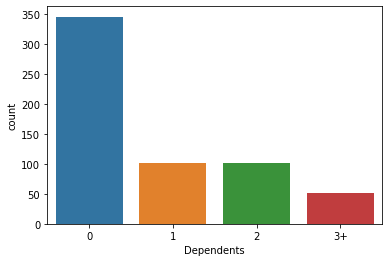

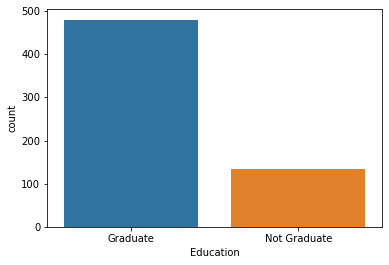

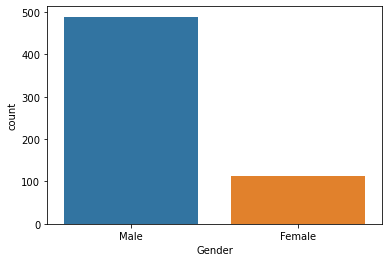

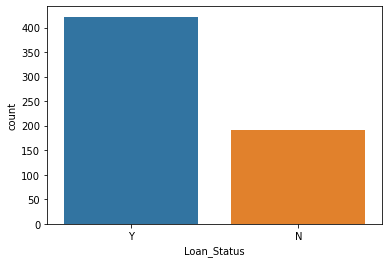

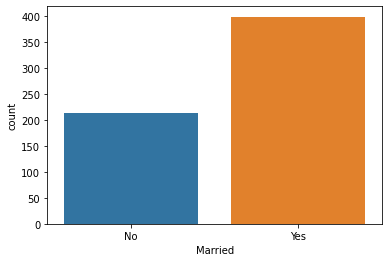

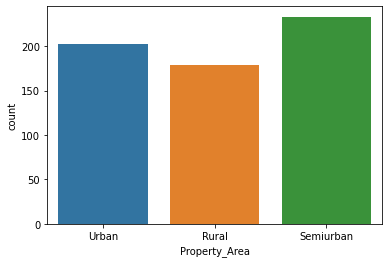

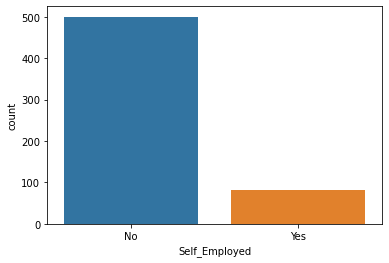

In [25]:
# Looking at the data distribution for different values.
plt.rcParams['figure.figsize'] = (6, 4)
for i in cat_vars:
    sns.countplot(x = cat_vars[i])
    plt.show()

In [26]:
# Count values of different values for each variables.
for i in cat_vars:
    print(cat_vars[i].value_counts(), end = '\n---------\n\n')

1.0    475
0.0     89
Name: Credit_History, dtype: int64
---------

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
---------

Graduate        480
Not Graduate    134
Name: Education, dtype: int64
---------

Male      489
Female    112
Name: Gender, dtype: int64
---------

Y    422
N    192
Name: Loan_Status, dtype: int64
---------

Yes    398
No     213
Name: Married, dtype: int64
---------

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
---------

No     500
Yes     82
Name: Self_Employed, dtype: int64
---------



In [27]:
# The values in the features contains some special characters which are to be treated.

In [28]:
cat_vars.Dependents = np.where(cat_vars.Dependents == '3+', '3_or_more', cat_vars.Dependents)

cat_vars.Education = np.where(cat_vars.Education == 'Not Graduate', 'Not_Graduate', cat_vars.Education)

In [29]:
# Count values of different values for each variables.
for i in cat_vars:
    print(cat_vars[i].value_counts(), end = '\n---------\n\n')

1.0    475
0.0     89
Name: Credit_History, dtype: int64
---------

0            345
1            102
2            101
3_or_more     51
Name: Dependents, dtype: int64
---------

Graduate        480
Not_Graduate    134
Name: Education, dtype: int64
---------

Male      489
Female    112
Name: Gender, dtype: int64
---------

Y    422
N    192
Name: Loan_Status, dtype: int64
---------

Yes    398
No     213
Name: Married, dtype: int64
---------

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
---------

No     500
Yes     82
Name: Self_Employed, dtype: int64
---------



### 1.3.2. Handling Missing values.

#### 1.3.2.1. Looking for presense of missing values.

In [30]:
for i in cat_vars:
    print(f'{i}: {cat_vars.shape[0] - cat_vars[i].count()}')

Credit_History: 50
Dependents: 15
Education: 0
Gender: 13
Loan_Status: 0
Married: 3
Property_Area: 0
Self_Employed: 32


There are few missing values.
Here also we are currently dropping these data points. It could also have been filled with mode values.

In [31]:
cat_vars = cat_vars.dropna()

In [32]:
for i in cat_vars:
    print(f'{i}: {cat_vars.shape[0] - cat_vars[i].count()}')

Credit_History: 0
Dependents: 0
Education: 0
Gender: 0
Loan_Status: 0
Married: 0
Property_Area: 0
Self_Employed: 0


In [33]:
# Changing dtype of necessary variable/s.
cat_vars.Credit_History = cat_vars.Credit_History.astype('int64')

### 1.3.3. Transforming categorical variables.

#### 1.3.3.1. Creating Dummies for Categorical variables.

In [34]:
cat_data = cat_vars.copy()

In [35]:
cat_data = pd.get_dummies(cat_data, drop_first = True)

In [36]:
cat_data

,Credit_History,Dependents_1,Dependents_2,Dependents_3_or_more,Education_Not_Graduate,Gender_Male,Loan_Status_Y,Married_Yes,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes
0,1,0,0,0,0,1,1,0,0,1,0
1,1,1,0,0,0,1,0,1,0,0,0
2,1,0,0,0,0,1,1,1,0,1,1
3,1,0,0,0,1,1,1,1,0,1,0
4,1,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0,0,0,1,0,0,0,0
610,1,0,0,1,0,1,1,1,0,0,0
611,1,1,0,0,0,1,1,1,0,1,0
612,1,0,1,0,0,1,1,1,0,1,0


<AxesSubplot:>

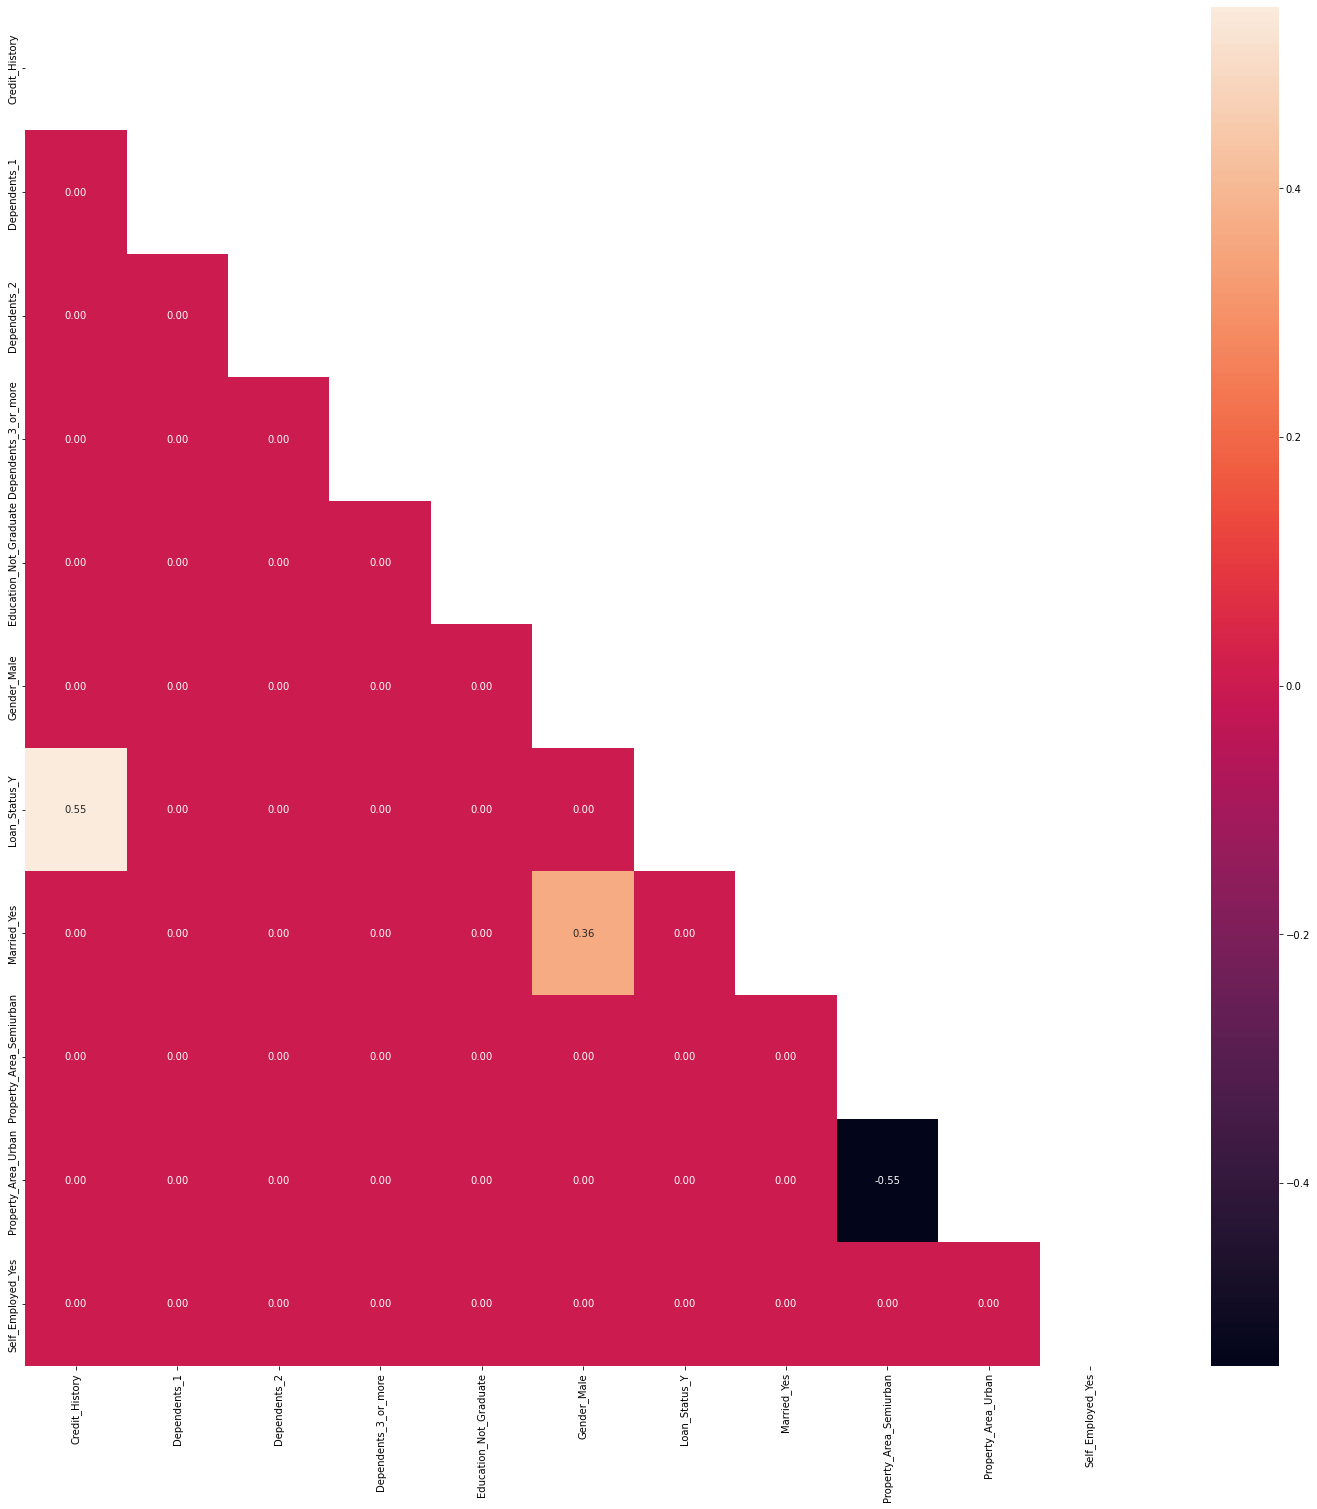

In [37]:
# Finding the correlation.
corr = cat_data.corr()

# Setting the size of figure.
plt.rcParams['figure.figsize'] = (25, 25)

# Argument Trimming out the values above the main diagonal.
mask = np.triu(corr)

# Setting low correlation value to 0.
corr[(corr.values < 0.3) & (corr.values > -0.3)] = 0

# Plotting the heatmap.
sns.heatmap(corr, annot = True, fmt = '.2f', mask = mask)

### I.4. Merging numerical and categorical variables.

In [38]:
cont_data.reset_index(inplace = True)
cat_data.reset_index(inplace = True)

In [39]:
# Combining Numerical and Categorical data.
final_data = pd.merge(cont_data, cat_data, on = 'index')
final_data.drop('index', inplace = True, axis = 1)
final_data.shape

(480, 16)

In [40]:
final_data.head()

,ApplicantIncome,CoapplicantIncome,DateOfBirth,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3_or_more,Education_Not_Graduate,Gender_Male,Loan_Status_Y,Married_Yes,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes
0,4583.0,1508.0,33,128.0,360.0,1,1,0,0,0,1,0,1,0,0,0
1,3000.0,0.0,36,66.0,360.0,1,0,0,0,0,1,1,1,0,1,1
2,2583.0,2358.0,26,120.0,360.0,1,0,0,0,1,1,1,1,0,1,0
3,6000.0,0.0,38,141.0,360.0,1,0,0,0,0,1,1,0,0,1,0
4,5417.0,4196.0,38,267.0,360.0,1,0,1,0,0,1,1,1,0,1,1


<AxesSubplot:>

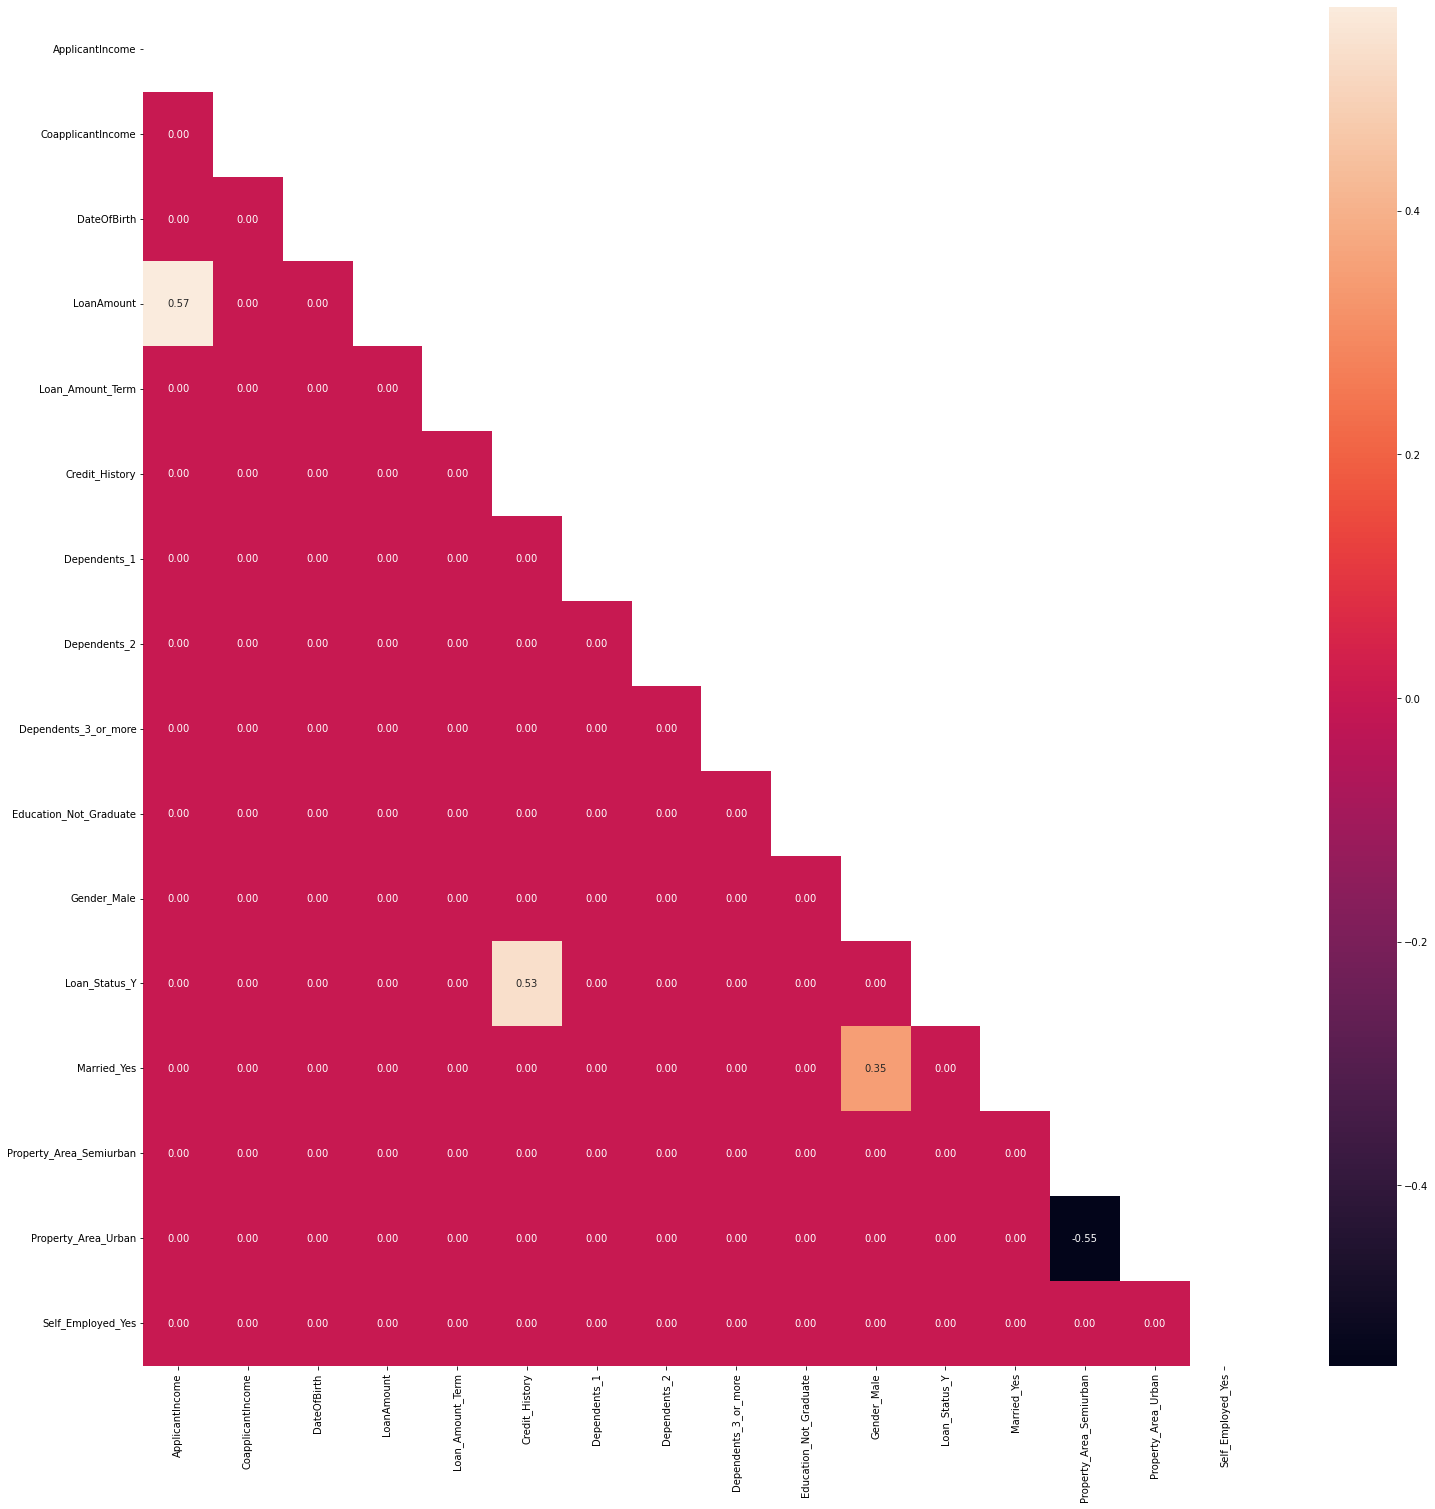

In [41]:
# Finding the correlation.
corr = final_data.corr()

# Setting the size of figure.
plt.rcParams['figure.figsize'] = (25, 25)

# Argument Trimming out the values above the main diagonal.
mask = np.triu(corr)

# Setting low correlation value to 0.
corr[(corr.values < 0.3) & (corr.values > -0.3)] = 0

# Plotting the heatmap.
sns.heatmap(corr, annot = True, fmt = '.2f', mask = mask)

# Feature Engineering and Feature Selection

#### Finding and dropping multi-collinear varibles

For classification based problems, we can either use VIF or Somers'D for finding the important varibles for the model.
VIF helps to decrease multi-collinearity, whereas Somers'D helps to find the variable that increases the predictive power of my model.

In [42]:
# Importing packages for discovering muti-collinear features
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

## VIF

In [43]:
# Separating X features from dataset and creating a model-parameter for statistical model building.
feature_columns = final_data.columns.difference(['Loan_Status_Y'])
model_params = 'Loan_Status_Y ~ ' + ' + '.join(feature_columns)
model_params

'Loan_Status_Y ~ ApplicantIncome + CoapplicantIncome + Credit_History + DateOfBirth + Dependents_1 + Dependents_2 + Dependents_3_or_more + Education_Not_Graduate + Gender_Male + LoanAmount + Loan_Amount_Term + Married_Yes + Property_Area_Semiurban + Property_Area_Urban + Self_Employed_Yes'

In [44]:
y, X = dmatrices(model_params, final_data, return_type = 'dataframe')

In [45]:
# Finding the VIF values and creating a dataframe to store these values corresponding to features name.
mul = pd.DataFrame()
mul['Features'] = X.columns

mul['VIF_values'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
mul

,Features,VIF_values
0,Intercept,89.927251
1,ApplicantIncome,2.053923
2,CoapplicantIncome,1.433683
3,Credit_History,1.022391
4,DateOfBirth,1.021419
5,Dependents_1,1.215928
6,Dependents_2,1.261236
7,Dependents_3_or_more,1.184701
8,Education_Not_Graduate,1.094175
9,Gender_Male,1.219645


In [46]:
# Finding the variables based on the cut-off value for VIF.
# Theoretically, the value should be more than 5 but practically it is taken as more than 4.
# However, any value (4 or 5) is correct based on the business problems.
# Here, all the values are between 1 and 2. So, we are using 1.5 as cut-off

f_data = mul[mul.VIF_values > 1.5].reset_index(drop = True)
f_data

,Features,VIF_values
0,Intercept,89.927251
1,ApplicantIncome,2.053923
2,LoanAmount,1.990281
3,Property_Area_Urban,1.508752


<AxesSubplot:>

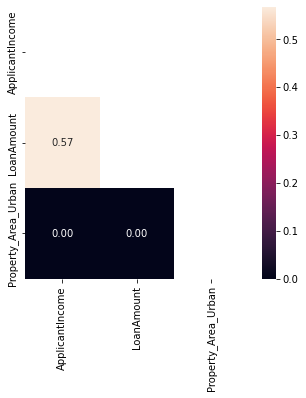

In [47]:
# Finding the correlation.
corr = final_data[f_data.Features[1:]].corr()

# Setting the size of figure.
plt.rcParams['figure.figsize'] = (5, 5)

# Argument Trimming out the values above the main diagonal.
mask = np.triu(corr)

# Setting low correlation value to 0.
corr[(corr.values < 0.3) & (corr.values > -0.3)] = 0

# Plotting the heatmap.
sns.heatmap(corr, annot = True, fmt = '.2f', mask = mask)

## Somers'D score

In [48]:
# Separating X features from dataset and creating a model-parameter for statistical model building.
feature_columns = final_data.columns.difference(['Loan_Status_Y'])
feature_columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'DateOfBirth',
       'Dependents_1', 'Dependents_2', 'Dependents_3_or_more',
       'Education_Not_Graduate', 'Gender_Male', 'LoanAmount',
       'Loan_Amount_Term', 'Married_Yes', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Self_Employed_Yes'],
      dtype='object')

In [49]:
# Finding out the Somers'D value foreach variables.
col = list()
score = list()
for i in feature_columns:
    model_params = f'Loan_Status_Y ~ {i}'
    log_reg = smf.logit(model_params, final_data).fit()
    somersD = 2 * metrics.roc_auc_score(final_data['Loan_Status_Y'], log_reg.predict(final_data)) - 1   
    col.append(i)
    score.append(somersD)

Optimization terminated successfully.
         Current function value: 0.617644
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.617722
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.483358
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.617755
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.616961
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.614959
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.617744
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615476
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615734
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615277
  

In [50]:
# Making a dataframe for Somers'D score for different variables.
som = {'Column_name' : col,
        'SomersD_value' : score}
f_vars = pd.DataFrame(som)
f_vars

,Column_name,SomersD_value
0,ApplicantIncome,0.011295
1,CoapplicantIncome,0.038485
2,Credit_History,0.404591
3,DateOfBirth,0.001221
4,Dependents_1,0.032563
5,Dependents_2,0.060648
6,Dependents_3_or_more,0.003500
7,Education_Not_Graduate,0.059508
8,Gender_Male,0.053566
9,LoanAmount,0.045181


In [51]:
# Taking the cut-off value for Somers'D as 0.1
f_vars1 = f_vars[f_vars.SomersD_value >= 0.1]

In [52]:
print(len(f_vars1.Column_name))
f_vars1.Column_name

3


2              Credit_History
11                Married_Yes
12    Property_Area_Semiurban
Name: Column_name, dtype: object

In [53]:
# Taking the cut-off value for Somers'D as 0.2
f_vars2 = f_vars[f_vars.SomersD_value >= 0.2]

In [54]:
print(len(f_vars2.Column_name))
f_vars2.Column_name

1


2    Credit_History
Name: Column_name, dtype: object

Ideally the cut-off value for Somers'D score should be greater than 0.2 but when we use this cut-off value, the number of variables become very less. Thus, we use 0.1 keeping in mind that this may result in some prediction error.

# Modelling

In [55]:
Model = list()
Accuracy = list()
AUC_score = list()

## Statistical Approach Logistic Regression.

In [56]:
# Creating a model-parameter for statistical model building.

model_params = 'Loan_Status_Y ~ ' + ' + '.join(f_vars1.Column_name)
model_params

'Loan_Status_Y ~ Credit_History + Married_Yes + Property_Area_Semiurban'

In [57]:
# Train test split for statistical models.
train, test = train_test_split(final_data, random_state = 42)

In [58]:
# model_params = '''Loan_Status_Y ~ Credit_History + Married_Yes + Property_Area_Semiurban'''
l = smf.logit(model_params, train).fit()
print(l.summary2())

Optimization terminated successfully.
         Current function value: 0.463455
         Iterations 6
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.247     
Dependent Variable:   Loan_Status_Y      AIC:                341.6875  
Date:                 2022-10-11 03:18   BIC:                357.2319  
No. Observations:     360                Log-Likelihood:     -166.84   
Df Model:             3                  LL-Null:            -221.58   
Df Residuals:         356                LLR p-value:        1.4260e-23
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept               -2.5813   0.4671 -5.5262 0.0000 -3.4968

In [59]:
# Find the AUC score of the model.
Model.append('Stats_Log_Reg')
auc = metrics.roc_auc_score(test.Loan_Status_Y, l.predict(test))
AUC_score.append(auc)
auc

0.7915596919127086

In [60]:
# Find cut-off value for prediction using Response rate for now.
cutOff = train.Loan_Status_Y.mean()
print('Cut-off value: ', cutOff)

# Find the Accuracy score of the model.
accuracy = metrics.accuracy_score(test.Loan_Status_Y, l.predict(test) > cutOff)
Accuracy.append(accuracy)
accuracy

Cut-off value:  0.6944444444444444


0.7583333333333333

## ML Models

In [61]:
# Separating dependent and independent variables from final_data on the basis of Somers'D score
X = final_data[f_vars1.Column_name]
y = final_data['Loan_Status_Y']

In [62]:
X.shape, y.shape

((480, 3), (480,))

In [63]:
# Train-Test split for building ML models.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12345)

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((336, 3), (144, 3), (336,), (144,))

### 1. ML based Logistic Regression

In [65]:
Model.append('ML_Log_reg')
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [66]:
# Find the Accuracy score of the model.
accuracy = metrics.accuracy_score(y_test, log_reg.predict(X_test))
Accuracy.append(accuracy)
accuracy

0.8055555555555556

In [67]:
# Find the AUC score of the model.
auc = metrics.roc_auc_score(y_test, log_reg.predict(X_test))
AUC_score.append(auc)
auc

0.7293617021276595

### 2. Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
# Using GridSearchCv to cross-validate the model and find the value of hyper-parameters.
param_grid = {'max_depth' : range(2, 15)}

tree_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10, n_jobs = -1, verbose = 1)
tree_clf.fit(X_train, y_train)

Fitting 10 folds for each of 13 candidates, totalling 130 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 15)}, verbose=1)

In [70]:
tree_clf.best_params_

{'max_depth': 2}

In [71]:
# Creating the model using best estimator after CV.
Model.append('DTree')
tree_clf = tree_clf.best_estimator_

In [72]:
# Find the Accuracy score of the model.
accuracy = metrics.accuracy_score(y_test, tree_clf.predict(X_test))
Accuracy.append(accuracy)
accuracy

0.8055555555555556

In [73]:
# Find the AUC score of the model.
auc = metrics.roc_auc_score(y_test, tree_clf.predict(X_test))
AUC_score.append(auc)
auc

0.7293617021276595

### 3. Random Forest

In [74]:
from sklearn import ensemble as en

In [75]:
# Using GridSearchCv to cross-validate the model and find the value of hyper-parameters.

param_grid = {'n_estimators' : [20, 30, 40, 50, 60, 70, 80, 90, 100], 
                 'max_features' : range(2, 15)}

rf_clf = en.RandomForestClassifier()
rf_clf = GridSearchCV(rf_clf, param_grid, cv = 5, n_jobs = -1, scoring = 'roc_auc', verbose = 1)
rf_clf.fit(X_train, y_train)

Fitting 5 folds for each of 117 candidates, totalling 585 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': range(2, 15),
                         'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100]},
             scoring='roc_auc', verbose=1)

In [76]:
rf_clf.best_params_

{'max_features': 2, 'n_estimators': 20}

In [77]:
# Creating the model using best estimator after CV.
Model.append('RForest')
rf_clf = rf_clf.best_estimator_

In [78]:
# Find the Accuracy score of the model.
accuracy = metrics.accuracy_score(y_test, rf_clf.predict(X_test))
Accuracy.append(accuracy)
accuracy

0.8055555555555556

In [79]:
# Find the AUC score of the model.
auc = metrics.roc_auc_score(y_test, rf_clf.predict(X_test))
AUC_score.append(auc)
auc

0.7293617021276595

### 4. Gradient Boosting

In [80]:
# Using GridSearchCv to cross-validate the model and find the value of hyper-parameters.

param_grid = {'n_estimators' : [40, 50, 60, 70, 80, 90, 100, 110, 120, 130], 
#               'learning_rate' : [10 ** x for x in range(-3, 2)],
                 'max_features' : range(2, 15)}

gb_clf = en.GradientBoostingClassifier()
gb_clf = GridSearchCV(gb_clf, param_grid, cv = 5, n_jobs = -1, scoring = 'roc_auc', verbose = 1)
gb_clf.fit(X_train, y_train)

Fitting 5 folds for each of 130 candidates, totalling 650 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_features': range(2, 15),
                         'n_estimators': [40, 50, 60, 70, 80, 90, 100, 110, 120,
                                          130]},
             scoring='roc_auc', verbose=1)

In [81]:
gb_clf.best_params_

{'max_features': 2, 'n_estimators': 40}

In [82]:
# Creating the model using best estimator after CV.
Model.append('GBoost')
gb_clf = gb_clf.best_estimator_

In [83]:
# Find the Accuracy score of the model.
accuracy = metrics.accuracy_score(y_test, gb_clf.predict(X_test))
Accuracy.append(accuracy)
accuracy

0.8055555555555556

In [84]:
# Find the AUC score of the model.
auc = metrics.roc_auc_score(y_test, gb_clf.predict(X_test))
AUC_score.append(auc)
auc

0.7293617021276595

### 5. Xtreme Gradient Boosting

In [85]:
from xgboost import XGBRFClassifier

In [86]:
# # Using GridSearchCv to cross-validate the model and find the value of hyper-parameters.

# param_grid = {'n_estimators' : [20, 30, 40, 50, 60, 70, 80], 
# #               'learning_rate' : [10 ** x for x in range(-3, 2)],
#                  'max_features' : range(2, 15)}

# xgb_clf = XGBRFClassifier(use_label_encoder=False, objective='reg:squarederror')
# xgb_clf = GridSearchCV(xgb_clf, param_grid, cv = 5, n_jobs = -1, scoring = 'roc_auc', verbose = 1)
# xgb_clf.fit(X_train, y_train)

In [87]:
# xgb_clf.best_params_

In [88]:
# # Creating the model using best estimator after CV.
# Model.append('XGBoost')
# xgb_clf = xgb_clf.best_estimator_

In [89]:
# Cross-validating wasn't giving any better output than without CV. Hence, CV was not used(done).

In [90]:
Model.append('XGBoost')
xgb_clf = XGBRFClassifier(use_label_encoder=False, objective='reg:squarederror')
xgb_clf.fit(X_train, y_train)

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False, gamma=0,
                gpu_id=-1, importance_type=None, interaction_constraints='',
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=8,
                num_parallel_tree=100, objective='reg:squarederror',
                predictor='auto', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact',
                use_label_encoder=False, validate_parameters=1, verbosity=None)

In [91]:
# Find the Accuracy score of the model.
accuracy = metrics.accuracy_score(y_test, xgb_clf.predict(X_test))
Accuracy.append(accuracy)
accuracy

0.8055555555555556

In [92]:
# Find the AUC score of the model.
auc = metrics.roc_auc_score(y_test, xgb_clf.predict(X_test))
AUC_score.append(auc)
auc

0.7293617021276595

In [93]:
# Looking at outcoems for all different models.
comp = {
    'Model' : Model,
    'AUC_score' : AUC_score,
    'Accuracy' : Accuracy
}
pd.DataFrame(comp)

,Model,AUC_score,Accuracy
0,Stats_Log_Reg,0.791560,0.758333
1,ML_Log_reg,0.729362,0.805556
2,DTree,0.729362,0.805556
3,RForest,0.729362,0.805556
4,GBoost,0.729362,0.805556
5,XGBoost,0.729362,0.805556


# -----ADD-ON-----

1. Use of RFE for feature elimination.
2. Handling Imbalance data Using RandomSampling, SMOTE and SMOTETomek approaches

In [94]:
# Separating dependent and independent variables from final_data on the basis of Somers'D score
X = final_data[feature_columns]
y = final_data['Loan_Status_Y']

In [95]:
X.shape, y.shape

((480, 15), (480,))

In [96]:
y.value_counts()

1    332
0    148
Name: Loan_Status_Y, dtype: int64

## Balancing the data

In [97]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek

In [98]:
over_sample = RandomOverSampler(random_state = 1234)
X_over_sample, y_over_sample = over_sample.fit_resample(X, y)
y_over_sample.value_counts()

0    332
1    332
Name: Loan_Status_Y, dtype: int64

In [99]:
smote_sample = SMOTE(random_state = 1234)
X_smote_sample, y_smote_sample = smote_sample.fit_resample(X, y)
y_smote_sample.value_counts()

0    332
1    332
Name: Loan_Status_Y, dtype: int64

In [100]:
smote_tomek_sample = SMOTETomek(random_state = 1234)
X_smote_tomek_sample, y_smote_tomek_sample = smote_tomek_sample.fit_resample(X, y)
y_smote_tomek_sample.value_counts()

0    277
1    277
Name: Loan_Status_Y, dtype: int64

## Use of RFE for feature elimination.

In [101]:
# Use any one at a time.

# X, y = X_smote_tomek_sample, y_smote_tomek_sample

# X, y = X_over_sample, y_over_sample 

X, y = X_smote_sample, y_smote_sample

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
rfe = RFE(DecisionTreeClassifier(random_state = 1234), n_features_to_select = 10)
rfe.fit(X, y)

RFE(estimator=DecisionTreeClassifier(random_state=1234),
    n_features_to_select=10)

In [104]:
X.columns[rfe.support_]

Index(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'DateOfBirth',
       'Dependents_2', 'Education_Not_Graduate', 'LoanAmount',
       'Loan_Amount_Term', 'Married_Yes', 'Property_Area_Semiurban'],
      dtype='object')

In [105]:
features = X.columns[rfe.support_]
X = X[features]
features

Index(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'DateOfBirth',
       'Dependents_2', 'Education_Not_Graduate', 'LoanAmount',
       'Loan_Amount_Term', 'Married_Yes', 'Property_Area_Semiurban'],
      dtype='object')

In [106]:
# Train-Test split for building ML models.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12345)

In [107]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((464, 10), (200, 10), (464,), (200,))

# Modelling

In [108]:
Model = list()
Accuracy = list()
AUC_score = list()

## Statistical Approach Logistic Regression.

In [109]:
# Creating a model-parameter for statistical model building.

model_params = 'Loan_Status_Y ~ ' + ' + '.join(features)
model_params

'Loan_Status_Y ~ ApplicantIncome + CoapplicantIncome + Credit_History + DateOfBirth + Dependents_2 + Education_Not_Graduate + LoanAmount + Loan_Amount_Term + Married_Yes + Property_Area_Semiurban'

In [110]:
# Train test split for statistical models.
train, test = train_test_split(final_data, random_state = 42)

In [111]:
# model_params = '''Loan_Status_Y ~ Credit_History + Married_Yes + Property_Area_Semiurban'''
l = smf.logit(model_params, train).fit()
print(l.summary2())

Optimization terminated successfully.
         Current function value: 0.455648
         Iterations 6
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.260     
Dependent Variable:   Loan_Status_Y      AIC:                350.0667  
Date:                 2022-10-11 03:19   BIC:                392.8139  
No. Observations:     360                Log-Likelihood:     -164.03   
Df Model:             10                 LL-Null:            -221.58   
Df Residuals:         349                LLR p-value:        4.9962e-20
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept               -1.5939   1.3178 -1.2095 0.2265 -4.1768

In [112]:
# Find the AUC score of the model.
Model.append('Stats_Log_Reg')
auc = metrics.roc_auc_score(test.Loan_Status_Y, l.predict(test))
AUC_score.append(auc)
auc

0.7788831835686778

In [113]:
# Find cut-off value for prediction using Response rate for now.
cutOff = train.Loan_Status_Y.mean()
print('Cut-off value: ', cutOff)

# Find the Accuracy score of the model.
accuracy = metrics.accuracy_score(test.Loan_Status_Y, l.predict(test) > cutOff)
Accuracy.append(accuracy)
accuracy

Cut-off value:  0.6944444444444444


0.7583333333333333

## ML Models

In [114]:
# Separating dependent and independent variables from final_data on the basis of Somers'D score
X = final_data[features]
y = final_data['Loan_Status_Y']

In [115]:
X.shape, y.shape

((480, 10), (480,))

In [116]:
# Train-Test split for building ML models.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12345)

In [117]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((336, 10), (144, 10), (336,), (144,))

### 1. ML based Logistic Regression

In [118]:
Model.append('ML_Log_reg')
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [119]:
# Find the Accuracy score of the model.
accuracy = metrics.accuracy_score(y_test, log_reg.predict(X_test))
Accuracy.append(accuracy)
accuracy

0.8125

In [120]:
# Find the AUC score of the model.
auc = metrics.roc_auc_score(y_test, log_reg.predict(X_test))
AUC_score.append(auc)
auc

0.7393617021276595

### 2. Decision Tree

In [121]:
from sklearn.tree import DecisionTreeClassifier

In [122]:
# Using GridSearchCv to cross-validate the model and find the value of hyper-parameters.
param_grid = {'max_depth' : range(2, 15)}

tree_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10, n_jobs = -1, verbose = 1)
tree_clf.fit(X_train, y_train)

Fitting 10 folds for each of 13 candidates, totalling 130 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 15)}, verbose=1)

In [123]:
tree_clf.best_params_

{'max_depth': 3}

In [124]:
# Creating the model using best estimator after CV.
Model.append('DTree')
tree_clf = tree_clf.best_estimator_

In [125]:
# Find the Accuracy score of the model.
accuracy = metrics.accuracy_score(y_test, tree_clf.predict(X_test))
Accuracy.append(accuracy)
accuracy

0.7638888888888888

In [126]:
# Find the AUC score of the model.
auc = metrics.roc_auc_score(y_test, tree_clf.predict(X_test))
AUC_score.append(auc)
auc

0.7114893617021276

### 3. Random Forest

In [127]:
from sklearn import ensemble as en

In [128]:
# Using GridSearchCv to cross-validate the model and find the value of hyper-parameters.

param_grid = {'n_estimators' : [20, 30, 40, 50, 60, 70, 80, 90, 100], 
                 'max_features' : range(2, 15)}

rf_clf = en.RandomForestClassifier()
rf_clf = GridSearchCV(rf_clf, param_grid, cv = 5, n_jobs = -1, scoring = 'roc_auc', verbose = 1)
rf_clf.fit(X_train, y_train)

Fitting 5 folds for each of 117 candidates, totalling 585 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': range(2, 15),
                         'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100]},
             scoring='roc_auc', verbose=1)

In [129]:
rf_clf.best_params_

{'max_features': 3, 'n_estimators': 60}

In [130]:
# Creating the model using best estimator after CV.
Model.append('RForest')
rf_clf = rf_clf.best_estimator_

In [131]:
# Find the Accuracy score of the model.
accuracy = metrics.accuracy_score(y_test, rf_clf.predict(X_test))
Accuracy.append(accuracy)
accuracy

0.7916666666666666

In [132]:
# Find the AUC score of the model.
auc = metrics.roc_auc_score(y_test, rf_clf.predict(X_test))
AUC_score.append(auc)
auc

0.7421276595744681

### 4. Gradient Boosting

In [133]:
# Using GridSearchCv to cross-validate the model and find the value of hyper-parameters.

param_grid = {'n_estimators' : [40, 50, 60, 70, 80, 90, 100, 110, 120, 130], 
#               'learning_rate' : [10 ** x for x in range(-3, 2)],
                 'max_features' : range(2, 15)}

gb_clf = en.GradientBoostingClassifier()
gb_clf = GridSearchCV(gb_clf, param_grid, cv = 5, n_jobs = -1, scoring = 'roc_auc', verbose = 1)
gb_clf.fit(X_train, y_train)

Fitting 5 folds for each of 130 candidates, totalling 650 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_features': range(2, 15),
                         'n_estimators': [40, 50, 60, 70, 80, 90, 100, 110, 120,
                                          130]},
             scoring='roc_auc', verbose=1)

In [134]:
gb_clf.best_params_

{'max_features': 2, 'n_estimators': 110}

In [135]:
# Creating the model using best estimator after CV.
Model.append('GBoost')
gb_clf = gb_clf.best_estimator_

In [136]:
# Find the Accuracy score of the model.
accuracy = metrics.accuracy_score(y_test, gb_clf.predict(X_test))
Accuracy.append(accuracy)
accuracy

0.7986111111111112

In [137]:
# Find the AUC score of the model.
auc = metrics.roc_auc_score(y_test, gb_clf.predict(X_test))
AUC_score.append(auc)
auc

0.7474468085106384

### 5. Xtreme Gradient Boosting

In [138]:
from xgboost import XGBRFClassifier

In [139]:
# # Using GridSearchCv to cross-validate the model and find the value of hyper-parameters.

# param_grid = {'n_estimators' : [20, 30, 40, 50, 60, 70, 80], 
# #               'learning_rate' : [10 ** x for x in range(-3, 2)],
#                  'max_features' : range(2, 15)}

# xgb_clf = XGBRFClassifier(use_label_encoder=False, objective='reg:squarederror')
# xgb_clf = GridSearchCV(xgb_clf, param_grid, cv = 5, n_jobs = -1, scoring = 'roc_auc', verbose = 1)
# xgb_clf.fit(X_train, y_train)

In [140]:
# xgb_clf.best_params_

In [141]:
# # Creating the model using best estimator after CV.
# Model.append('XGBoost')
# xgb_clf = xgb_clf.best_estimator_

In [142]:
# Cross-validating wasn't giving any better output than without CV. Hence, CV was not used(done).

In [143]:
Model.append('XGBoost')
xgb_clf = XGBRFClassifier(use_label_encoder=False, objective='reg:squarederror')
xgb_clf.fit(X_train, y_train)

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False, gamma=0,
                gpu_id=-1, importance_type=None, interaction_constraints='',
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=8,
                num_parallel_tree=100, objective='reg:squarederror',
                predictor='auto', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact',
                use_label_encoder=False, validate_parameters=1, verbosity=None)

In [144]:
# Find the Accuracy score of the model.
accuracy = metrics.accuracy_score(y_test, xgb_clf.predict(X_test))
Accuracy.append(accuracy)
accuracy

0.7708333333333334

In [145]:
# Find the AUC score of the model.
auc = metrics.roc_auc_score(y_test, xgb_clf.predict(X_test))
AUC_score.append(auc)
auc

0.7121276595744681

In [146]:
# Looking at outcoems for all different models.
comp = {
    'Model' : Model,
    'AUC_score' : AUC_score,
    'Accuracy' : Accuracy
}
pd.DataFrame(comp)

,Model,AUC_score,Accuracy
0,Stats_Log_Reg,0.778883,0.758333
1,ML_Log_reg,0.739362,0.812500
2,DTree,0.711489,0.763889
3,RForest,0.742128,0.791667
4,GBoost,0.747447,0.798611
5,XGBoost,0.712128,0.770833


## Working on the new dataset

In [147]:
data1 = pd.read_csv("data 1.csv")
print(data1.shape)
data1.head()

(367, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,DateOfBirth
0,HF001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,15-Jun-1992
1,HF001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,28-Sep-1993
2,HF001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,25-Nov-1991
3,HF001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,03-Jun-1984
4,HF001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,22-Mar-1982


In [148]:
data1.drop(['Loan_ID'], axis = 1, inplace = True)

In [149]:
cont_data1 = data1[['ApplicantIncome', 'CoapplicantIncome', 'DateOfBirth', 'LoanAmount', 'Loan_Amount_Term']]
# cont_data1

In [150]:
def converter(date):
    return dt.now().year - dt.strptime(date, "%d-%b-%Y").year

In [151]:
cont_data1.DateOfBirth = cont_data1.DateOfBirth.apply(converter)

In [152]:
def outlierTreat(x):
    upper = x.quantile(.75) + 1.5 * (x.quantile(.75) - x.quantile(.25)) 
    lower = x.quantile(.25) - 1.5 * (x.quantile(.75) - x.quantile(.25))
    return x.clip(lower, upper)

In [153]:
out_vars = ["ApplicantIncome", "CoapplicantIncome"]

In [154]:
cont_data1.loc[:, out_vars] = cont_data1.loc[:, out_vars].apply(outlierTreat)
# cont_data1.loc[:, out_vars]

In [155]:
cont_data1 = cont_data1.dropna()

In [156]:
cat_vars1 = data1[['Credit_History', 'Dependents', 'Education', 'Gender', 'Married', 'Property_Area', 'Self_Employed']]
# cat_vars1

In [157]:
cat_vars1.Dependents = np.where(cat_vars1.Dependents == '3+', '3_or_more', cat_vars1.Dependents)

cat_vars1.Education = np.where(cat_vars1.Education == 'Not Graduate', 'Not_Graduate', cat_vars1.Education)

In [158]:
cat_vars1 = cat_vars1.dropna()

In [159]:
# Changing dtype of necessary variable/s.
cat_vars1.Credit_History = cat_vars1.Credit_History.astype('int64')

In [160]:
cat_data1 = cat_vars1.copy()

In [161]:
cat_data1 = pd.get_dummies(cat_data1, drop_first = True)

In [162]:
cont_data1.reset_index(inplace = True)
cat_data1.reset_index(inplace = True)

In [163]:
# Combining Numerical and Categorical data.
final_data = pd.merge(cont_data1, cat_data1, on = 'index')
final_data.drop('index', inplace = True, axis = 1)
final_data.shape

(289, 15)

In [164]:
final_data.head()

,ApplicantIncome,CoapplicantIncome,DateOfBirth,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3_or_more,Education_Not_Graduate,Gender_Male,Married_Yes,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes
0,5720.0,0.0,30,110.0,360.0,1,0,0,0,0,1,1,0,1,0
1,3076.0,1500.0,29,126.0,360.0,1,1,0,0,0,1,1,0,1,0
2,5000.0,1800.0,31,208.0,360.0,1,0,1,0,0,1,1,0,1,0
3,3276.0,0.0,40,78.0,360.0,1,0,0,0,1,1,0,0,1,0
4,2165.0,3422.0,35,152.0,360.0,1,0,0,0,1,1,1,0,1,1


In [165]:
# final_data.loc[:, rfe.support_]
results = xgb_clf.predict(final_data.loc[:, rfe.support_])
results

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0])

In [166]:
# Merging the results with the data set.
final_data['Loan_Approval'] = results
final_data.head()

,ApplicantIncome,CoapplicantIncome,DateOfBirth,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3_or_more,Education_Not_Graduate,Gender_Male,Married_Yes,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes,Loan_Approval
0,5720.0,0.0,30,110.0,360.0,1,0,0,0,0,1,1,0,1,0,1
1,3076.0,1500.0,29,126.0,360.0,1,1,0,0,0,1,1,0,1,0,1
2,5000.0,1800.0,31,208.0,360.0,1,0,1,0,0,1,1,0,1,0,0
3,3276.0,0.0,40,78.0,360.0,1,0,0,0,1,1,0,0,1,0,0
4,2165.0,3422.0,35,152.0,360.0,1,0,0,0,1,1,1,0,1,1,0


# Have A Great Day.

# EOF

#  ------Coming Soon------

1. Proper missing values treatment.
2. In depth insight of data using different charts.